In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from surprise.model_selection import KFold, train_test_split
from surprise.accuracy import rmse
from surprise import Dataset, Reader, SVDpp, dump
from scipy.sparse import csr_matrix

from sklearn.metrics import ndcg_score as ndcg

**Import Data**

In [2]:
df_song = pd.read_csv('Dataset/song_data.csv')
df_song

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
...,...,...,...,...,...
999995,SOTXAME12AB018F136,O Samba Da Vida,Pacha V.I.P.,Kiko Navarro,0
999996,SOXQYIQ12A8C137FBB,Jago Chhadeo,Naale Baba Lassi Pee Gya,Kuldeep Manak,0
999997,SOHODZI12A8C137BB3,Novemba,Dub_Connected: electronic music,Gabriel Le Mar,0
999998,SOLXGOR12A81C21EB7,Faraday,The Trance Collection Vol. 2,Elude,0


In [3]:
df_user_item = pd.read_csv('Dataset/preprocessed_data_categorized.csv')
df_user_item

,user_id,music_id,rating
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,1
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,2
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,2
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1


In [4]:
user_item_matrix = df_user_item.pivot_table(values='rating', index='music_id', columns='user_id', fill_value=None)
user_item_matrix

user_id,00003a4459f33b92906be11abe0e93efc423c0ff,00005c6177188f12fb5e2e82cdbd93e8a3f35e64,00030033e3a2f904a48ec1dd53019c9969b6ef1f,0007235c769e610e3d339a17818a5708e41008d9,0007c0e74728ca9ef0fe4eb7f75732e8026a278b,000a5c8b4d8b2c98f7a205219181d039edcd4506,000b474f815bcff17a4bc9ce5324f9352dafe07d,000b4e4134d5f77d7608fbf86fb3e1adac4478a8,000b9a54ef0560b957ee0f7a4cb933c36025e600,000d2df2cb8ad7300f89512f8fe8fadc4f99e733,...,fff877d23bf5b31fa2b013f51a7f939f12c374f2,fffa7a01e539be1f23e471503f29d8acb3c0ce7c,fffad4a128cd3d130f06c0f7bf493781081afe3c,fffb701ee87a32eff67eb040ed59146121f01571,fffc0df75a48d823ad5abfaf2a1ee61eb1e3302c,fffce9c1537fbc350ea68823d956eaa8f5236dbe,fffd6a2bdef646ce9898b628d5dd56c43df69a9d,fffd9635b33f412de8ed02e44e6564e3644cf3c6,fffe6d1d8500f1c1f31bd63abce35c0f975a86bf,fffea3d509760c984e7d40789804c0e5e289cc86
music_id,,,,,,,,,,,,,,,,,,,,,
SOAAAGQ12A8C1420C8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOAACPJ12A81C21360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOAACSG12AB018DC80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOAAEJI12AB0188AB5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOAAFAC12A67ADF7EB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SOZZTNF12A8C139916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOZZVWB12AB0189C30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOZZWZV12A67AE140F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**SVD++**

In [5]:
reader = Reader(rating_scale=(1, 5))
data_user_item = Dataset.load_from_df(df_user_item[['user_id', 'music_id', 'rating']], reader)
kf = KFold(n_splits=5)
top_n = 10

In [6]:
dict_song = dict(zip(df_song["song_id"], df_song["title"]))

def getPredictions(trainset, testset, model=None):
    algo = None
    if model is not None:
        algo = model
    else:
        algo = SVDpp()
        algo.fit(trainset)
    predictions = algo.test(testset)
    return predictions, algo

def saveOrLoadModel(filename, trainset, testset, model=None):
    curr_path = os.getcwd()
    file_path = f'{curr_path}\\{filename}'
    if not os.path.exists(file_path):
        predictions, algo = getPredictions(trainset, testset, model)
        dump.dump(filename, predictions, algo)
        return predictions
    else:
        predictions, algo = dump.load(file_path)
        return predictions


def evaluateModel(predictions, print_results=True):
    # RMSE
    rmse_score = rmse(predictions)

    #NDCG
    user_dict = {}
    for pred in predictions:
        user_dict.setdefault(pred.uid, [0])
        user_dict[pred.uid].append(pred.est)

    ndcg_array = []
    for user in user_dict:
        true = sorted(user_dict[user], reverse=True)
        output = user_dict[user]
        ndcg_array.append(ndcg([true], [output], k=10))


    ndcg_score = np.mean(ndcg_array)
    if print_results == True:
        print(f'NDCG: {ndcg_score:.4f}')

    return rmse_score, ndcg_score
    

**Evaluation within 5-Fold Cross Validation**

In [7]:
i = 1
rmse_scores = []
ndcg_scores = []
for trainset, testset in kf.split(data_user_item):
    print(f'\nFold {i}:')
    predictions = saveOrLoadModel(f'svdpp-fold-{i}.pikl', trainset, testset)
    
    rmse_score, ndcg_score = evaluateModel(predictions)
    rmse_scores.append(rmse_score)
    ndcg_scores.append(ndcg_score)
    i += 1
    
mean_rmse_score = np.mean(rmse_scores)
mean_ndcg_score = np.mean(ndcg_scores)
print(f'\nMean RMSE: {mean_rmse_score:.4f}')
print(f'Mean NDCG: {mean_ndcg_score:.4f}')


Fold 1:
RMSE: 0.4420
NDCG: 0.8230

Fold 2:
RMSE: 0.4421
NDCG: 0.8232

Fold 3:
RMSE: 0.4425
NDCG: 0.8236

Fold 4:
RMSE: 0.4420
NDCG: 0.8228

Fold 5:
RMSE: 0.4427
NDCG: 0.8229

Mean RMSE: 0.4423
Mean NDCG: 0.8231


In [8]:
best_model = dump.load(f'svdpp-fold-{np.argmin(rmse_score)+1}.pikl')[1]
trainset, testset = train_test_split(data_user_item)  
predictions = saveOrLoadModel('svdpp-full.pikl', trainset, testset, best_model)
evaluateModel(predictions)

RMSE: 0.4144
NDCG: 0.8215


(0.41438538967297006, 0.8215211897077254)

**Generate Recommendation**

In [9]:
def getRecommendations(model, user_id, items):
    preds = items.copy()
    for item in preds.index:
        preds[item] = model.predict(user_id, item).est

    sorted_preds = preds.sort_values(ascending=False)
    sorted_preds = pd.concat([sorted_preds, pd.Series([0])], axis=0)
    preds = pd.concat([preds, pd.Series([0])], axis=0)

    print(f'\nTop {top_n} song recommendations for user {user_id}:')
    for i in range(top_n):
        print(f'{i+1}. {dict_song[preds.index[i]]} ({preds.iloc[i]:.4f})')
    
    print(f'\nTop {top_n} song recommendations for user {user_id} (Optimal):')
    for i in range(top_n):
        print(f'{i+1}. {dict_song[sorted_preds.index[i]]} ({sorted_preds.iloc[i]:.4f})')

    ndcg_score = ndcg([sorted_preds], [preds], k=top_n)
    print(f'\nNDCG: {ndcg_score:.4f}')

In [10]:
# user_id = 'd1c674c0e4b0c89757fa6f88aefd089e38e5bed2'
user_id = df_user_item.user_id.sample().values[0]
selected_ui_matrix = user_item_matrix[user_id]
selected_ui_matrix = selected_ui_matrix[selected_ui_matrix.isnull()]


getRecommendations(best_model, user_id, selected_ui_matrix)


Top 10 song recommendations for user 3f83a39c276fdd052ea5d74c2956a4c7b81e77b8:
1. Orgelblut (1.4928)
2. Cearc Agus Coileach / The Hen And Cock (1.4590)
3. I Gotta Feeling (Edit) (1.5527)
4. Godlovesugly (1.4914)
5. Rome Wasn't Built In A Day (1.4992)
6. Jesus Loves You (Album Version) (1.8027)
7. End Of The World Party (1.4117)
8. So Confused (feat. Butta Creame) (amended album version) (1.6981)
9. Stay Awhile (1.4148)
10. Nomenclature (1.3719)

Top 10 song recommendations for user 3f83a39c276fdd052ea5d74c2956a4c7b81e77b8 (Optimal):
1. 221 (2.2311)
2. Cold Blooded (Acid Cleanse) (2.2000)
3. Encore Break (2.1821)
4. Bros Sto Rimagmeno Spiti (2003 Digital Remaster) (2.1620)
5. Working With Homesick (2.1547)
6. Chapel Of Ghouls (Live) (2.1244)
7. In League With Satan (2.1082)
8. Clara meets Slope - Hard To Say (2.1017)
9. Machine Kit (2.0534)
10. Black Man Ray (2.0432)

NDCG: 0.7594


**Epoch Experiments**

In [ ]:
exp_trainset, exp_testset = train_test_split(data_user_item)

In [11]:
epochs = [10, 20, 50, 100, 150, 200, 250, 300]
rmse_scores_epoch = []
ndcg_scores_epoch = []
for epoch in epochs:
    print(f'\nEpoch: {epoch}')
    algo = SVDpp(n_epochs=epoch)
    algo.fit(exp_trainset)
    predictions = algo.test(exp_testset)
    rmse_score, ndcg_score = evaluateModel(predictions)
    rmse_scores_epoch.append(rmse_score)
    ndcg_scores_epoch.append(ndcg_score)


factor: 10
RMSE: 0.4415

factor: 20
RMSE: 0.4420

factor: 50
RMSE: 0.4433

factor: 100
RMSE: 0.4453

factor: 150
RMSE: 0.4473

factor: 200
RMSE: 0.4493

factor: 250
RMSE: 0.4515

factor: 300
RMSE: 0.4529


In [ ]:
factors = [10, 20, 50, 100, 150, 200, 250, 300]
rmse_scores_factor = []
ndcg_scores_factor = []

for factor in factors:
    print(f'\nFactor: {factor}')
    algo = SVDpp(n_factors=factor)
    algo.fit(exp_trainset)
    predictions = algo.test(exp_testset)
    rmse_score, ndcg_score = evaluateModel(predictions)
    rmse_scores_factor.append(rmse_score)
    ndcg_scores_factor.append(ndcg_score)

[0.4415152408942805, 0.44196041683524456, 0.44328666567449876, 0.44529941885628166, 0.44730588645565555, 0.4492928421596813, 0.4515343610669054, 0.4528779336458468]
[0.8241671123990262, 0.8232355423431554, 0.8208786139697742, 0.8183327831236035, 0.8157330552722214, 0.8141616971747077, 0.8128810170350524, 0.8112946550189866]


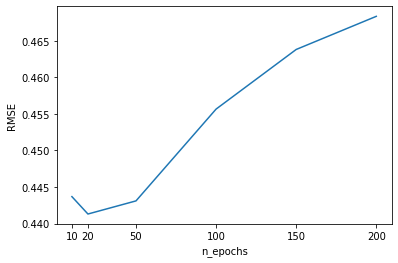

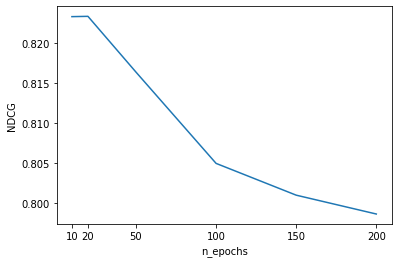

In [14]:
fig1,ax1 = plt.subplots()
ax1.plot(epochs, rmse_scores_epoch)
ax1.set_xticks(epochs)
ax1.set_xlabel('n_epochs')
ax1.set_ylabel('RMSE')

fig2,ax2 = plt.subplots()
ax2.plot(epochs, ndcg_scores_epoch)
ax2.set_xticks(epochs)
ax2.set_xlabel('n_epochs')
ax2.set_ylabel('NDCG')
plt.show()

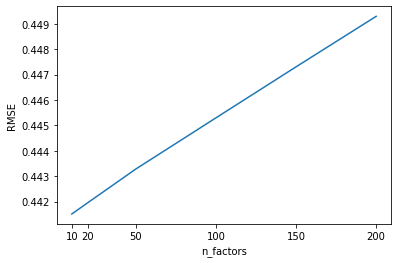

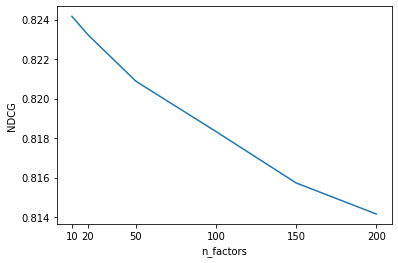

In [15]:
fig1,ax1 = plt.subplots()
ax1.plot(factors, rmse_scores_factor)
ax1.set_xticks(factors)
ax1.set_xlabel('n_factors')
ax1.set_ylabel('RMSE')

fig2,ax2 = plt.subplots()
ax2.plot(factors, ndcg_scores_factor)
ax2.set_xticks(factors)
ax2.set_xlabel('n_factors')
ax2.set_ylabel('NDCG')
plt.show()